In [17]:
import numpy as np
from matplotlib import pyplot as plt
import DBOperations as dbo
import usersSnapshots as us

In [18]:
DATABASE_FILE = "../../db.sqlite3"

In [19]:
conn = dbo.connect(DATABASE_FILE)
plt.style.use('_mpl-gallery-nogrid')
numOfUsers = dbo.countTableRows(conn, "main", "fileshare_fileuser")

([<matplotlib.patches.Wedge at 0x7f1c6e5c7520>,
 [Text(1.982131490234419, 0.9545442658258875, 'Have downloads'),
  Text(-1.9821314455489747, -0.9545443586161583, '')],
 [Text(1.0811626310369555, 0.5206605086323022, '14.3%'),
  Text(-1.081162606663077, -0.5206605592451772, '85.7%')])

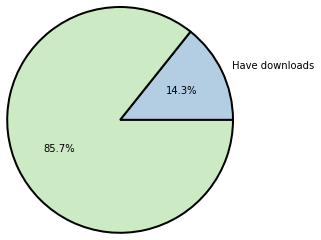

In [20]:
tables = dbo.getTables(conn)

usersWithDownloadedFiles = dbo.colSearch(conn, "fileshare_fileuser", "hasDownloadedFile", "1")

labels = "Have downloads", ""
sizes = [usersWithDownloadedFiles, numOfUsers - usersWithDownloadedFiles]
colors = plt.get_cmap("Pastel1")(np.linspace(0.2, 0.7, numOfUsers))
fig, ax = plt.subplots()
ax.pie(
       sizes,
       labels=labels,
       colors=colors,
       radius=2, 
       wedgeprops={"linewidth": 2, "edgecolor": "black", 'antialiased': True},
       frame=False, 
       startangle=0,
       autopct='%.1f%%',
       pctdistance=0.6
)

Here, we see the proportion of registered users, who have downloaded files off of the site (blue) to the whole userbase. Showing us that these users are active on the site.

([<matplotlib.patches.Wedge at 0x7f1c6e58eb20>,
 [Text(0.9545441730356147, 1.9821315349198587, 'Have uploads'),
  Text(-0.9545441730356146, -1.982131534919859, '')],
 [Text(0.5206604580194261, 1.0811626554108318, '35.7%'),
  Text(-0.5206604580194261, -1.081162655410832, '64.3%')])

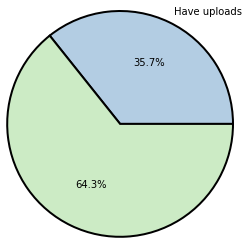

In [21]:
userFilesAmounts = [int(i[0]) for i in dbo.readColumn(conn, "fileshare_fileuser", "filesAmount")]
usersWithUploads = 0
for amount in userFilesAmounts:
    if amount:
        usersWithUploads += 1

labels = "Have uploads", ""
sizes = [usersWithUploads, len(dbo.readColumn(conn, "fileshare_fileuser", "filesAmount")) - usersWithUploads]
colors = plt.get_cmap("Pastel1")(np.linspace(0.2, 0.7, numOfUsers))
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    radius=2, 
    wedgeprops={"linewidth": 2, "edgecolor": "black", 'antialiased': True},
    frame=False, 
    startangle=0,
    autopct='%.1f%%',
    pctdistance=0.6
)

In the pie chart above, we can see the proportion of users, who have any files uploaded on their profile (blue) to the whole userbase. These users can also be considered active.

([<matplotlib.patches.Wedge at 0x7f1c6e4ef280>,
 [Text(1.4900194097207635, 1.6185926475353174, 'Active users'),
  Text(-1.4900194097207642, -1.6185926475353167, '')],
 [Text(0.8127378598476892, 0.8828687168374457, '26.3%'),
  Text(-0.8127378598476894, -0.8828687168374455, '73.7%')])

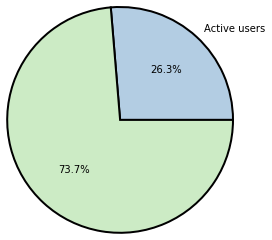

In [22]:
activeUsers = max(usersWithDownloadedFiles, usersWithUploads)

labels = "Active users", ""
sizes = [activeUsers, numOfUsers]
colors = plt.get_cmap("Pastel1")(np.linspace(0.2, 0.7, numOfUsers))
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    radius=2, 
    wedgeprops={"linewidth": 2, "edgecolor": "black", 'antialiased': True},
    frame=False, 
    startangle=0,
    autopct='%.1f%%',
    pctdistance=0.6
)

The chart above shows the amount of active users on the site against the whole userbase.

<BarContainer object of 10 artists>

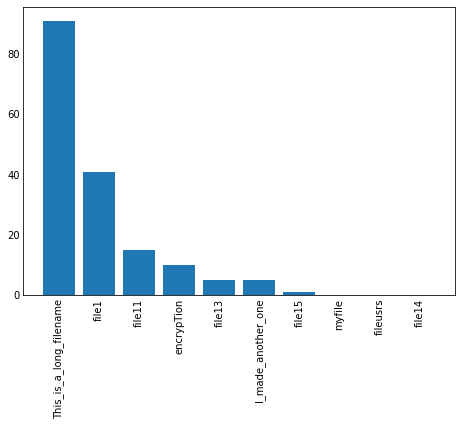

In [23]:
vals = dbo.readColumns(conn, "fileshare_file", "name", "downloads")

res = {}
for idx, val in enumerate(vals):
    res[vals[idx][0]] = vals[idx][1]

res = sorted(res.items(), key=lambda x:x[1])
res.reverse()

graphNames = [i[0] for i in res][:10] #* names of the files
graphVals = [i[1] for i in res][:10] #* numbers of downloads of files

fig = plt.figure()
ax = fig.add_axes([0, 0, 3, 2])
plt.xticks(range(len(graphNames)), graphNames, rotation="vertical")
ax.bar(graphNames, graphVals)

In the graph above, we can see the 10 most downloaded on the site. Therefore, we can assume these are the most popular.

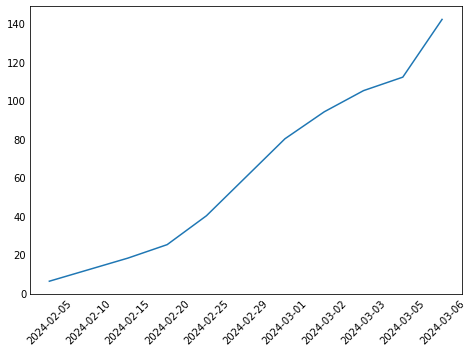

In [24]:
snapshots = us.getSnapshots()
userCount = []
dates = []
for i in range(1, len(snapshots) + 1):
    userCount.append(int(snapshots[f"snapshot{i}"]["users"]))
    dates.append(snapshots[f"snapshot{i}"]["time"][:10])

fig = plt.figure()
ax = fig.add_axes([0, 0, 3, 2])
plt.xticks(range(len(dates)), dates, rotation=45)
ax.plot(dates, userCount)

The graph above shows the evolution of the userbase in time.